## 向量运算更新向量位置

In [1]:
import numpy as np
weights = np.array([1, -1, 1])
miss_point = np.array([2, 1, 1])
learning_rate = 0.5
if((weights.dot(miss_point)) > 0):
  weights = weights - learning_rate*miss_point

print(weights)

[ 0.  -1.5  0.5]


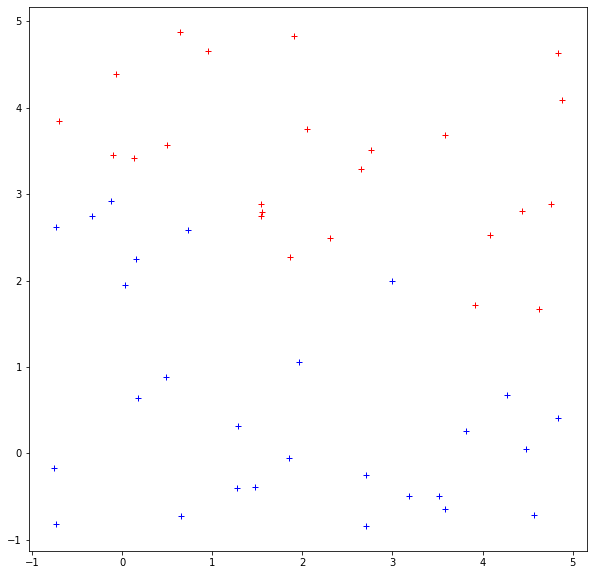

In [2]:
import matplotlib.pyplot as plt
data = np.genfromtxt('simple.dat',delimiter=',',skip_header=1)

plt.rc('figure',figsize=(10,10))

pos = [x for x in data if x[2] == 1]

neg = [x for x in data if x[2] == 0]

plt.plot([x[0] for x in pos], [x[1] for x in pos],'r+')
plt.plot([x[0] for x in neg], [x[1] for x in neg],'b+')


In [3]:
def plot_line(weight,x_lim):
  x1 = x_lim[0]
  x2 = x_lim[1]
  y1 = -(weight[0] * x1 +weight[2])/weight[1]
  y2 = -(weight[0] * x2 +weight[2])/weight[1]
  point1 = np.array([x1,x2])
  point2 = np.array([y1,y2])
  return point1,point2

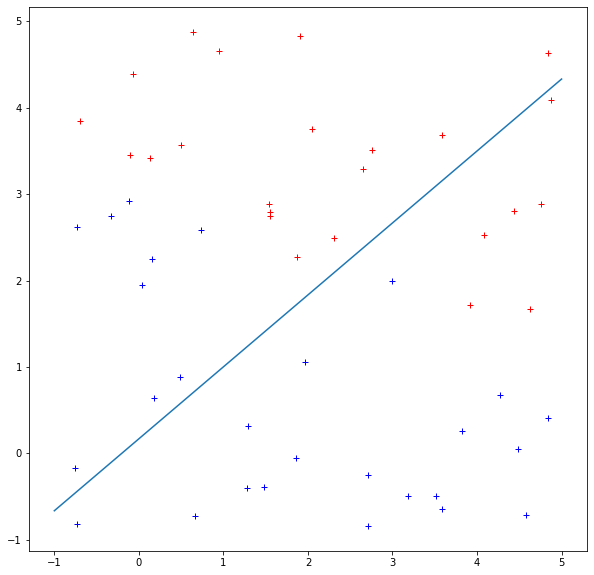

In [4]:
weight = np.array([10, -12 ,2])
x_lim = [-1,5]
point1,point2 = plot_line(weight,x_lim)
plt.plot([x[0] for x in pos], [x[1] for x in pos],'r+')
plt.plot([x[0] for x in neg], [x[1] for x in neg],'b+')
plt.plot(point1,point2)


 new weight:
[ 0.10039813  0.29939382 -0.99530576]


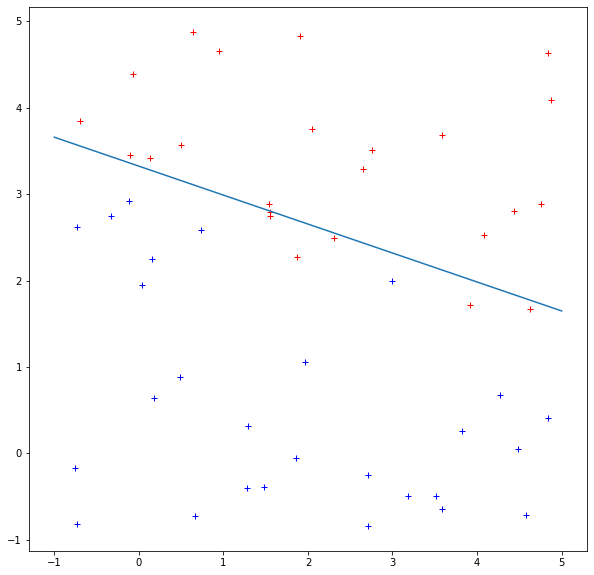

In [5]:
x_lim = [-1,5]
plt.rc('figure',figsize=(10,10))

pos = [x for x in data if x[2] == 1]
neg = [x for x in data if x[2] == 0]

plt.plot([x[0] for x in pos], [x[1] for x in pos],'r+')
plt.plot([x[0] for x in neg], [x[1] for x in neg],'b+')

weight = np.random.uniform(0,3,(1,3))[0]

lr = 0.01
epoch = 100000

for i in range(epoch):
  for input_point in data:
    data_point = np.array([input_point[0],input_point[1],1.0])
    #calclulate the classification
    if(input_point[2] == 0):
     if((weight.dot(data_point)) > 0):
       weight = weight - lr * data_point
    elif(input_point[2] == 1):
     if(weight.dot(data_point) < 0):
       weight = weight + lr * data_point
pointx,pointy = plot_line(weight,x_lim)
plt.plot(pointx,pointy)

print('\n new weight:')
print(weight)



 new weight:
[ 0.12868692  0.12409849 -0.28436399]


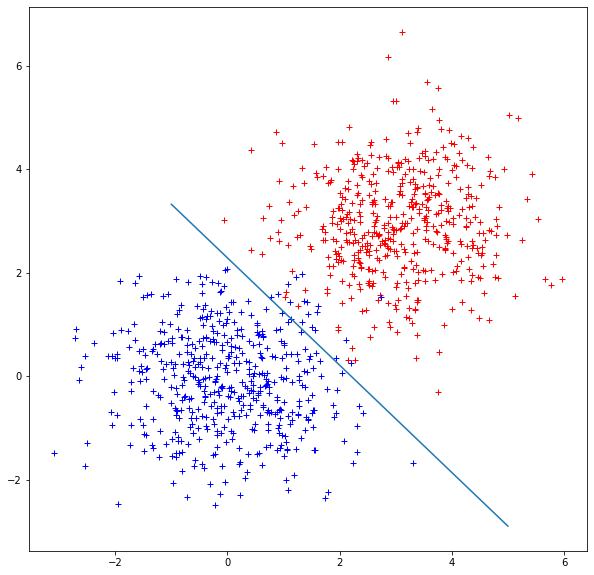

In [6]:
data = np.genfromtxt('gauss.dat',delimiter=',',skip_header=1)
plt.rc('figure',figsize=(10,10))

pos = [x for x in data if x[2] == 1]
neg = [x for x in data if x[2] == 0]

plt.plot([x[0] for x in pos], [x[1] for x in pos],'r+')
plt.plot([x[0] for x in neg], [x[1] for x in neg],'b+')

weight = np.random.uniform(0,3,(1,3))[0]

lr = 0.01
epoch = 10000

for i in range(epoch):
  for input_point in data:
    data_point = np.array([input_point[0],input_point[1],1.0])
    #calclulate the classification
    if(input_point[2] == 0):
     if((weight.dot(data_point)) > 0):
       weight = weight - lr * data_point
    elif(input_point[2] == 1):
     if(weight.dot(data_point) < 0):
       weight = weight + lr * data_point
pointx,pointy = plot_line(weight,x_lim)
plt.plot(pointx,pointy)

print('\n new weight:')
print(weight)


 new weight:
[-0.03750148 -0.02575352 -0.00422173]


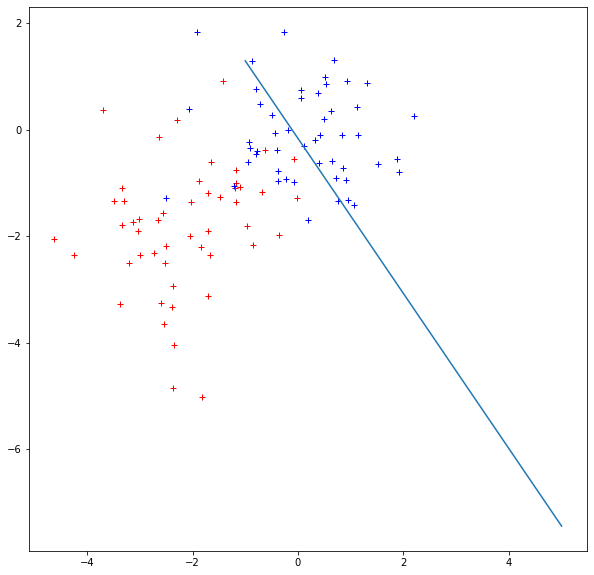

In [7]:
data = np.genfromtxt('imbalance.dat',delimiter=',',skip_header=1)
plt.rc('figure',figsize=(10,10))

pos = [x for x in data if x[2] == 1]
neg = [x for x in data if x[2] == 0]

index_1 = []
index_2 = []
#随机删除多余的部分数据
index_1=np.random.choice(len(neg),len(neg) - len(pos),replace=False)
index_2=np.arange(len(neg))
index_2=np.delete(index_2,index_1)
neg_temp = neg
neg = []
for index in index_2:
  neg.append(neg_temp[index])

plt.plot([x[0] for x in pos], [x[1] for x in pos],'r+')
plt.plot([x[0] for x in neg], [x[1] for x in neg],'b+')


weight = np.random.uniform(0,3,(1,3))[0]

lr = 0.01
epoch = 10000

for i in range(epoch):
  for input_point in data:
    data_point = np.array([input_point[0],input_point[1],1.0])
    #calclulate the classification
    if(input_point[2] == 0):
     if((weight.dot(data_point)) > 0):
       weight = weight - lr * data_point
    elif(input_point[2] == 1):
     if(weight.dot(data_point) < 0):
       weight = weight + lr * data_point
pointx,pointy = plot_line(weight,x_lim)
plt.plot(pointx,pointy)

print('\n new weight:')
print(weight)

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
labels = [x[2] for x in data]

data_point = []
for input_point in data: 
  x = np.array([input_point[0],input_point[1],1.0])
  data_point.append(x)

# data_point = [ x for input_point in data: x = np.array([input_point[0],input_point[1],1.0])]
    
predicted = []
for point in data_point:
  if(weight.dot(point) < 0):
     x = 0.0
  else:
     x = 1.0
  predicted.append(x)
print(labels)
print(predicted) 
cm = confusion_matrix(labels, predicted)#puting label and predicted in testset can generate the confusion matrix 
cm

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

array([[260, 240],
       [  0,  50]], dtype=int64)

In [9]:
import itertools

def plot_confusion_matrix(cm,
                          classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
import csv
    This function prints and plots the confusion matrix very prettily.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)

    # Specify the tick marks and axis text
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    # The data formatting
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Print the text of the matrix, adjusting text colour for display
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

Confusion matrix, without normalization


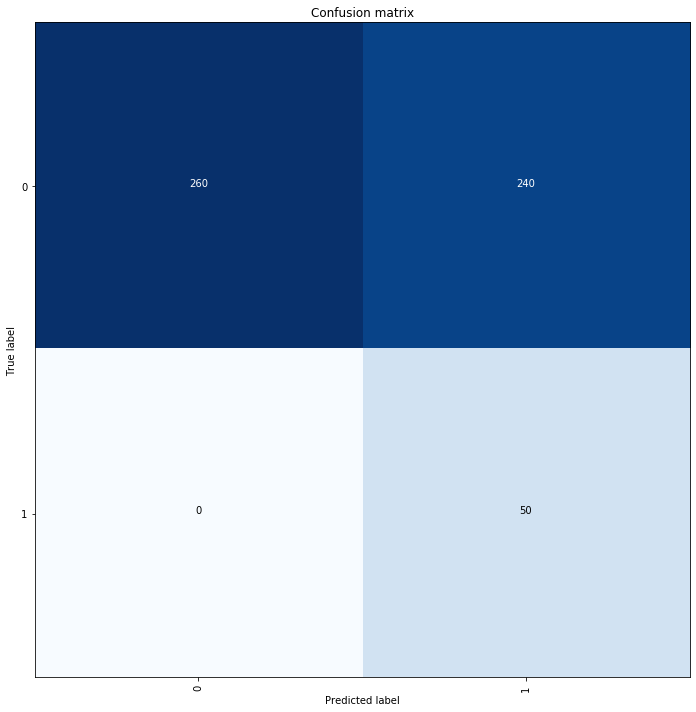

In [10]:
class_names = [0,1]
plot_confusion_matrix(cm, class_names)